In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import load_training_data, load_test_data
import networkx as nx
from utils import plot_graph

In [2]:
graphs, labels =  load_training_data()
submi_graphs = load_test_data()

# Graphs objects

In [3]:
g1, g2 = graphs[0:2]

In [4]:
print(repr(g1.nodes))
print(g1.nodes[0], ",", g1.nodes()[0])
print(g1.nodes[0]['labels'])
print(g1.nodes[0]['labels'][0], "\n")

print(repr(g1.nodes(data=True)))
print(repr(g1.nodes("labels")))
print(repr(nx.get_node_attributes(g1, "labels")))

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))
{'labels': [1]} , {'labels': [1]}
[1]
1 

NodeDataView({0: {'labels': [1]}, 1: {'labels': [1]}, 2: {'labels': [2]}, 3: {'labels': [0]}, 4: {'labels': [0]}, 5: {'labels': [1]}, 6: {'labels': [1]}, 7: {'labels': [1]}, 8: {'labels': [1]}, 9: {'labels': [1]}, 10: {'labels': [1]}, 11: {'labels': [1]}, 12: {'labels': [1]}, 13: {'labels': [1]}, 14: {'labels': [1]}, 15: {'labels': [1]}})
NodeDataView({0: [1], 1: [1], 2: [2], 3: [0], 4: [0], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1], 10: [1], 11: [1], 12: [1], 13: [1], 14: [1], 15: [1]}, data='labels')
{0: [1], 1: [1], 2: [2], 3: [0], 4: [0], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1], 10: [1], 11: [1], 12: [1], 13: [1], 14: [1], 15: [1]}


In [5]:
print(repr(g1.edges))
print(repr(g1.edges(data=True)))
print(repr(g1.edges(data="labels")))
print(nx.get_edge_attributes(g1, "labels"))
print()

u = next(u for u in g1.edges())
print(type(u), u)
print()

print(repr(g1.edges(4)))
print(repr(g1.edges(4, "labels")))

EdgeView([(0, 1), (0, 3), (0, 8), (1, 4), (1, 7), (2, 6), (2, 9), (2, 10), (3, 5), (4, 11), (5, 6), (7, 15), (8, 14), (9, 12), (10, 13), (14, 15)])
EdgeDataView([(0, 1, {'labels': [2]}), (0, 3, {'labels': [0]}), (0, 8, {'labels': [2]}), (1, 4, {'labels': [0]}), (1, 7, {'labels': [2]}), (2, 6, {'labels': [0]}), (2, 9, {'labels': [0]}), (2, 10, {'labels': [0]}), (3, 5, {'labels': [0]}), (4, 11, {'labels': [0]}), (5, 6, {'labels': [0]}), (7, 15, {'labels': [2]}), (8, 14, {'labels': [2]}), (9, 12, {'labels': [0]}), (10, 13, {'labels': [0]}), (14, 15, {'labels': [2]})])
EdgeDataView([(0, 1, [2]), (0, 3, [0]), (0, 8, [2]), (1, 4, [0]), (1, 7, [2]), (2, 6, [0]), (2, 9, [0]), (2, 10, [0]), (3, 5, [0]), (4, 11, [0]), (5, 6, [0]), (7, 15, [2]), (8, 14, [2]), (9, 12, [0]), (10, 13, [0]), (14, 15, [2])])
{(0, 1): [2], (0, 3): [0], (0, 8): [2], (1, 4): [0], (1, 7): [2], (2, 6): [0], (2, 9): [0], (2, 10): [0], (3, 5): [0], (4, 11): [0], (5, 6): [0], (7, 15): [2], (8, 14): [2], (9, 12): [0], (10, 13)

In [6]:
print("Edge    , Edge's label, First node's label, Second node's label")
for u in g1.edges():
    print("{:8}  {:7}  {:14}  {:19}".format(str(u), g1[u[0]][u[1]]['labels'][0], g1.nodes[u[0]]['labels'][0], g1.nodes[u[1]]['labels'][0]))

Edge    , Edge's label, First node's label, Second node's label
(0, 1)          2               1                    1
(0, 3)          0               1                    0
(0, 8)          2               1                    1
(1, 4)          0               1                    0
(1, 7)          2               1                    1
(2, 6)          0               2                    1
(2, 9)          0               2                    1
(2, 10)         0               2                    1
(3, 5)          0               0                    1
(4, 11)         0               0                    1
(5, 6)          0               1                    1
(7, 15)         2               1                    1
(8, 14)         2               1                    1
(9, 12)         0               1                    1
(10, 13)        0               1                    1
(14, 15)        2               1                    1


# Aspect

Warning, some labels are >= 9 : [9 9 9]
Warning, some labels are >= 9 : [23]


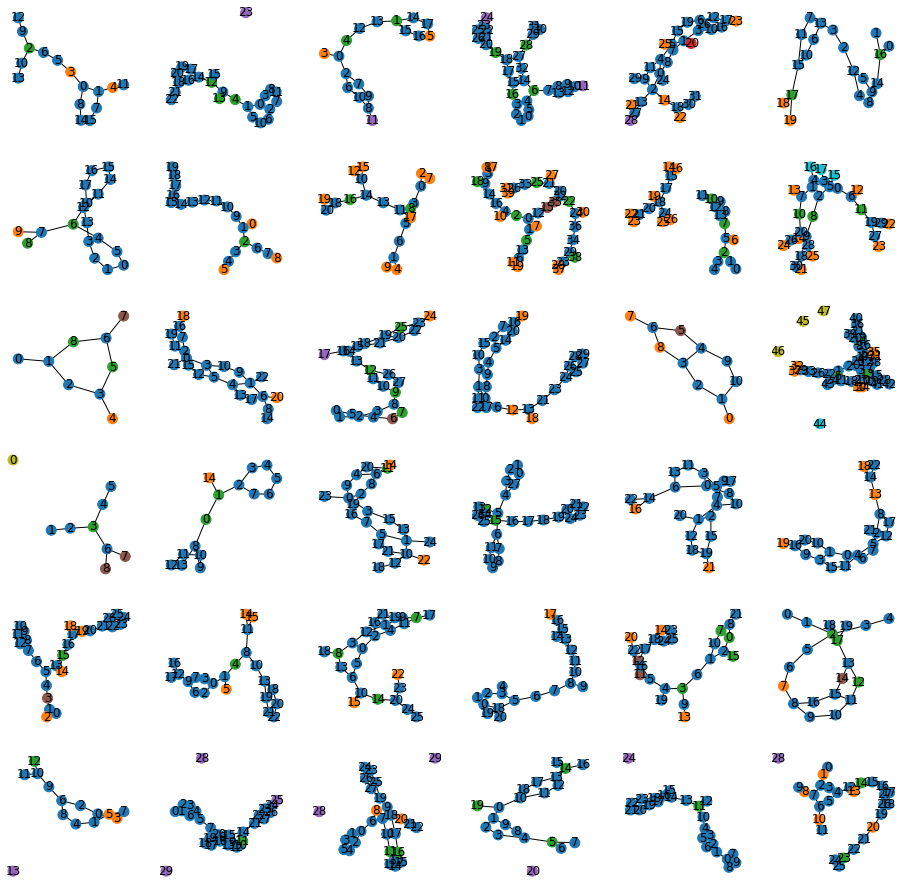

In [7]:
plt.figure(figsize=(16, 16))
for i in range(36):
    g = graphs[i]
    plt.subplot(6,6,i+1)
    plot_graph(g, node_size = 100)

# Connected components

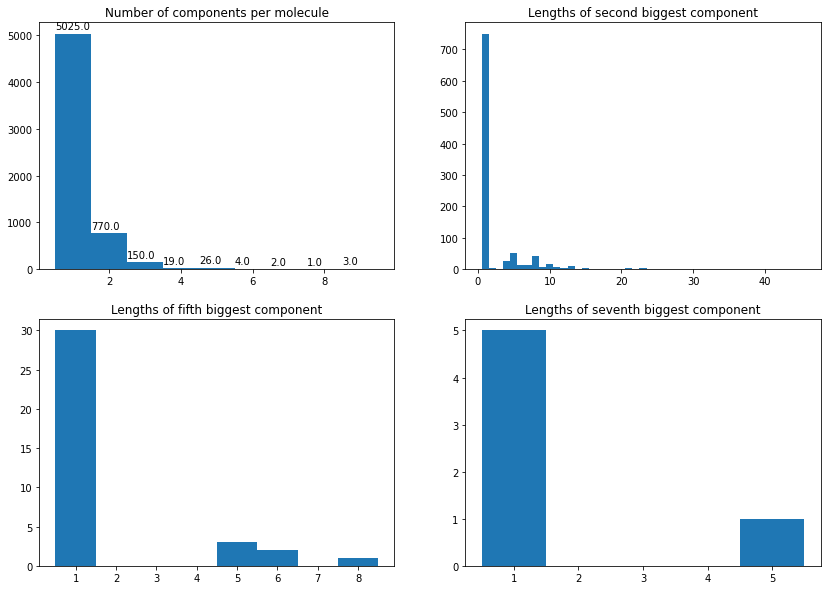

In [8]:
comps_len = [np.sort([len(comp) for comp in nx.connected_components(G)])[::-1] for G in graphs]
n_comp = np.array([len(cl) for cl in comps_len])

comps_len_array = np.zeros((n_comp.shape[0], n_comp.max()))
for i, cl in enumerate(comps_len):
    comps_len_array[i, :n_comp[i]] = cl

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
hights, lims, _ = axes[0].hist(n_comp, bins=np.arange(n_comp.max() + 1) + 0.5)
axes[0].set_title("Number of components per molecule")
for i in range(len(hights)): axes[0].text(lims[i], hights[i] + 100, hights[i])

comp_len_i = comps_len_array[:,1]
don = comp_len_i[comp_len_i > 0]
axes[1].hist(don, bins = np.arange(don.max() + 1)+0.5)
axes[1].set_title("Lengths of second biggest component")

comp_len_i = comps_len_array[:,4]
don = comp_len_i[comp_len_i > 0]
axes[2].hist(don, bins = np.arange(don.max() + 1)+0.5)
axes[2].set_title("Lengths of fifth biggest component")

comp_len_i = comps_len_array[:,6]
don = comp_len_i[comp_len_i > 0]
axes[3].hist(don, bins = np.arange(don.max() + 1)+0.5)
axes[3].set_title("Lengths of seventh biggest component")
plt.show()

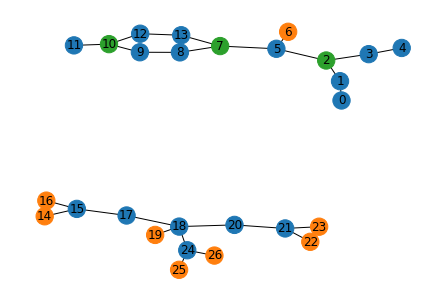

In [9]:
plot_graph(graphs[10])

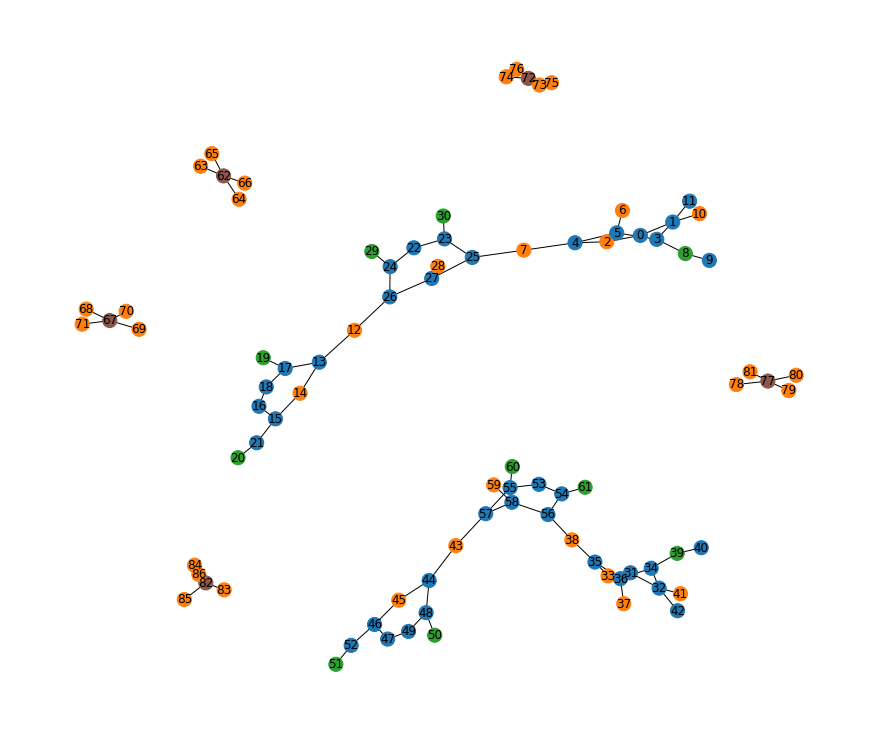

In [10]:
plt.figure(figsize=(12, 10))
plot_graph(graphs[1290], node_size=200)

## Dependence on Labels

In [12]:
print(np.unique(labels))
print(np.mean((labels + 1)/2))

[-1  1]
0.0925


In [13]:
print(np.mean((labels[n_comp == 1] + 1)/2))
print(np.mean((labels[n_comp == 2] + 1)/2))
print(np.mean((labels[n_comp == 3] + 1)/2))

0.09492537313432836
0.08181818181818182
0.06666666666666667


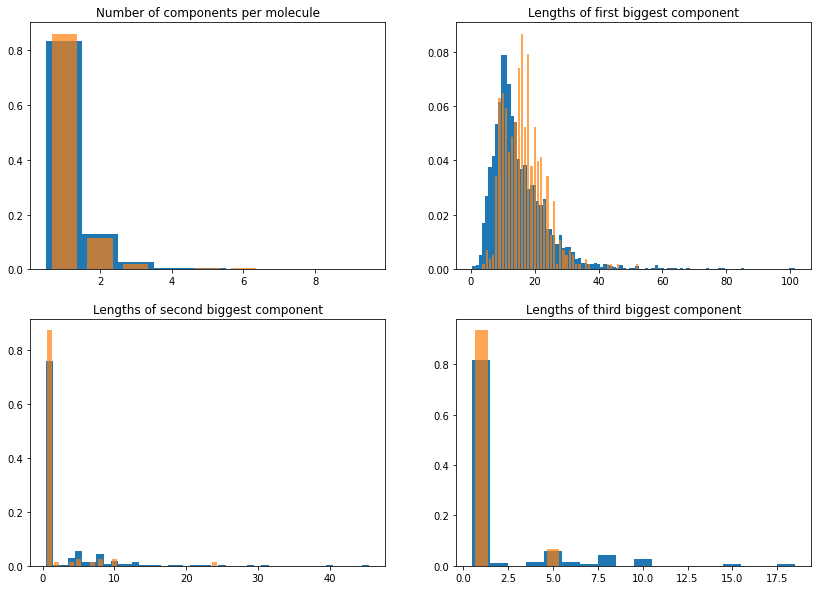

In [14]:
# comps_len = [np.sort([len(comp) for comp in nx.connected_components(G)])[::-1] for G in graphs]
# n_comp = np.array([len(cl) for cl in comps_len])

# comps_len_array = np.zeros((n_comp.shape[0], n_comp.max()))
# for i, cl in enumerate(comps_len):
#     comps_len_array[i, :n_comp[i]] = cl

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
axes[0].hist(n_comp[labels==-1], bins=np.arange(n_comp.max() + 1) + 0.5, density=True)
axes[0].hist(n_comp[labels==1], bins=np.arange(n_comp.max() + 1) + 0.5, density=True, alpha=0.7, rwidth=0.7)
axes[0].set_title("Number of components per molecule")

comp_len_i = comps_len_array[:,0]
don = comp_len_i[comp_len_i > 0]
axes[1].hist(comp_len_i[(comp_len_i > 0) & (labels==-1)], bins = np.arange(don.max() + 1)+0.5, density = True)
axes[1].hist(comp_len_i[(comp_len_i > 0) & (labels==1)], bins = np.arange(don.max() + 1)+0.5, density = True, alpha=0.7, rwidth=0.7)
axes[1].set_title("Lengths of first biggest component")

comp_len_i = comps_len_array[:,1]
don = comp_len_i[comp_len_i > 0]
axes[2].hist(comp_len_i[(comp_len_i > 0) & (labels==-1)], bins = np.arange(don.max() + 1)+0.5, density = True)
axes[2].hist(comp_len_i[(comp_len_i > 0) & (labels==1)], bins = np.arange(don.max() + 1)+0.5, density = True, alpha=0.7, rwidth=0.7)
axes[2].set_title("Lengths of second biggest component")

comp_len_i = comps_len_array[:,2]
don = comp_len_i[comp_len_i > 0]
axes[3].hist(comp_len_i[(comp_len_i > 0) & (labels==-1)], bins = np.arange(don.max() + 1)+0.5, density = True)
axes[3].hist(comp_len_i[(comp_len_i > 0) & (labels==1)], bins = np.arange(don.max() + 1)+0.5, density = True, alpha=0.7, rwidth=0.7)
axes[3].set_title("Lengths of third biggest component")
plt.show()

# Instructions

The evaluation pages describes how submissions will be scored and how students should format their submissions. 

The metric is the AUC (area under curve). The data contains 2 classes. 

## Submission Format 
Submission files should contain two columns: Id and Prediction. 
The file should contain a header and have the format described below. 
Id represents the identifier of the test example, ranging from 1 to 2000. The prediction is the corresponding logit which is a real number. 

Ex: ``` Id,Prediction 1, -1.1 2, 3.2 3, -2.4 4,-0.5 5,2.1 6,0.1 7,-0.9 ``` 

Below, you will also find a piece of code for reading/writing the data. 
```python 
import pickle as pkl 
import pandas as pd 
with open('training_data.pkl', 'rb') as file: 
    train_graphs = pkl.load(file) 
with open('test_data.pkl', 'rb') as file: 
    test_graphs = pkl.load(file) 
with open('training_labels.pkl', 'rb') as file: 
    train_labels = pkl.load(file) 

# define your learning algorithm here 
# for instance, define an object called ``classifier'' 
classifier.train(train_labels,train_graphs)

# predict on the test data 
# for instance, 
test_preds = classifier.predict(test_graphs) 
Yte = {'Prediction' : test_preds}
dataframe = pd.DataFrame(Yte)
dataframe.index += 1
dataframe.to_csv('test_pred.csv',index_label='Id') 
```
